In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

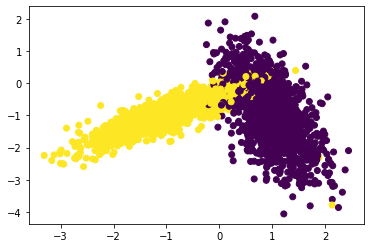

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
from random import seed

In [4]:
# referencce : 
# https://www.kaggle.com/code/bhushanyadav07/implementing-custom-randomsearchcv
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    trainscores = []
    testscores  = []    
    global params
    params=[]
    seed(7)
    params= random.sample(range(param_range[0],param_range[1]), 10) 
    params.sort() 
    print(params)
    length = int(len(x_train)/folds) 
    foldsX = []
    foldsY = []
    for i in range(folds-1):
        foldsX += [x_train[i*length:(i+1)*length]]
        foldsY += [y_train[i*length:(i+1)*length]]       
    foldsX += [x_train[(folds-1)*length:len(x_train)]]
    foldsY += [y_train[(folds-1)*length:len(y_train)]]
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds):
            X_test  = foldsX[j]
            Y_test  = foldsY[j]
            G=np.delete(foldsX,j,0)      
            V=np.delete(foldsY,j,0)
            X_train = np.concatenate(G)
            Y_train =  np.concatenate(V) 
            
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train) 
            
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted)) 
            
            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores   

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[2, 3, 4, 5, 11, 12, 13, 18, 19, 21]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.59it/s]


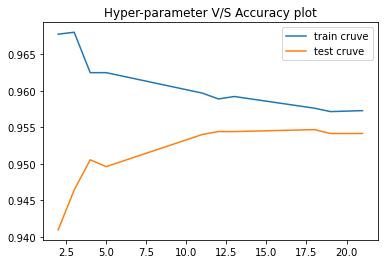

[2, 3, 4, 5, 11, 12, 13, 18, 19, 21]


In [5]:
neigh = KNeighborsClassifier()
param_range=(1,30)
folds = 3
trainscores,testscores = RandomSearchCV(X_train,y_train,neigh, param_range, folds) 
plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter V/S Accuracy plot')
plt.legend()
plt.show()
print(params)

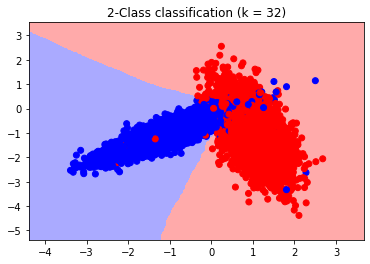

In [6]:
# reference : 
# https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
# https://www.kaggle.com/code/bhushanyadav07/implementing-custom-randomsearchcv
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X1, X2, y, clf):
       
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

neigh = KNeighborsClassifier(n_neighbors = 32)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

other sources used :
github,
w3schools